In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
msg = pd.read_csv('/content/document.csv',names=['message','label'])
print("Total Instances of Dataset:",msg.shape[0])
msg['labelnum'] = msg.label.map({'pos':1,'neg':0})
X = msg['message']
y = msg['labelnum']
print(msg)

Total Instances of Dataset: 18
                                  message label  labelnum
0                    I love this sandwich   pos         1
1                This is an amazing place   pos         1
2      I feel very good about these beers   pos         1
3                    This is my best work   pos         1
4                    What an awesome view   pos         1
5           I do not like this restaurant   neg         0
6                I am tired of this stuff   neg         0
7                  I can't deal with this   neg         0
8                    He is my sworn enemy   neg         0
9                     My boss is horrible   neg         0
10               This is an awesome place   pos         1
11  I do not like the taste of this juice   neg         0
12                        I love to dance   pos         1
13      I am sick and tired of this place   neg         0
14                   What a great holiday   pos         1
15         That is a bad locality to stay

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)


In [ ]:
vectorizer = CountVectorizer()
Xtrain_dm = vectorizer.fit_transform(Xtrain)
Xtest_dm = vectorizer.transform(Xtest)

In [ ]:
Xtrain_dm

<13x43 sparse matrix of type '<class 'numpy.int64'>'
	with 62 stored elements in Compressed Sparse Row format>

In [ ]:
clf = MultinomialNB()
clf.fit(Xtrain_dm,ytrain)


MultinomialNB()

In [ ]:
pred = clf.predict(Xtest_dm)
print('Accuracy:',accuracy_score(ytest,pred))
print('Confusion Matrix:\n',confusion_matrix(ytest,pred))


Accuracy: 0.8
Confusion Matrix:
 [[2 1]
 [0 2]]


In [ ]:
user_input = input("Enter a message to predict its sentiment: ")
user_input_dm = vectorizer.transform([user_input])
user_pred = clf.predict(user_input_dm)
sentiment = 'positive' if user_pred[0] == 1 else 'negative'
print(f"Predicted Sentiment:", sentiment)

Enter a message to predict its sentiment: i love cricket
Predicted Sentiment: positive


Precision : 0.67
Recall : 1.00
F1 score: 0.80


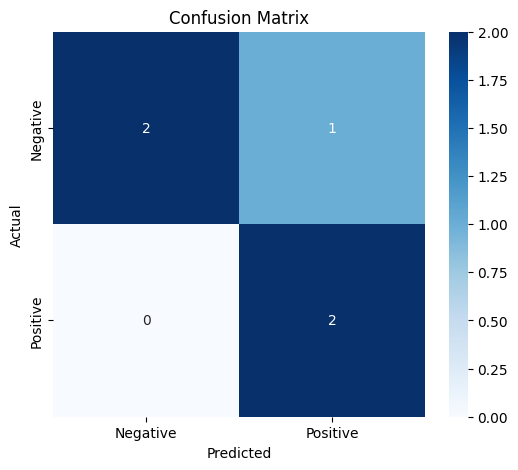

In [ ]:
  # calculate precision,recall, and F1_score
  precision = precision_score(ytest, pred)
  recall = recall_score(ytest, pred)
  f1 = f1_score(ytest, pred)
  print(f'Precision : { precision:.2f}')
  print(f'Recall : {recall:.2f}')
  print(f'F1 score: {f1:.2f}')
  # Calculate and store the confusion matrix in 'cm'
cm = confusion_matrix(ytest, pred) # This line is added to calculate and assign the confusion matrix to 'cm'
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# plot precision ,recall , f1 score
metrics_values = [precision,recall,f1]
metrics_labels = ['Precision', 'Recall', 'F1 Score']
